In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

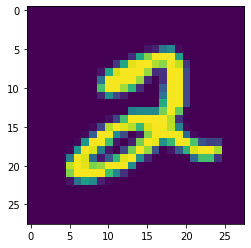

In [3]:
plt.imshow(x_train[5])

In [4]:
x_train=x_train/255
x_test=x_test/255

In [5]:
encoder_input=keras.Input(shape=(28,28,1),name='img')
x=keras.layers.Flatten()(encoder_input)
encoder_out=keras.layers.Dense(64,activation='relu')(x)
encoder=keras.Model(encoder_input,encoder_out,name='encoder')

In [6]:
decoder_input=keras.layers.Dense(64,activation='relu')(encoder_out)
x=keras.layers.Dense(784,activation='relu')(decoder_input)
decoder_output=keras.layers.Reshape((28,28,1))(x)


In [7]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001,decay=1e-6)

In [8]:
autoencoder=keras.Model(encoder_input,decoder_output,name='autoencoder')

In [9]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 105,360
Trainable params: 105,360
Non-tra

In [10]:
autoencoder.compile(opt,loss='mse')

In [11]:
epochs=3
for epoch in range(epochs):
    history=autoencoder.fit(x_train,x_train,epochs=1,batch_size=32,validation_split=0.10)
    autoencoder.save(f"models/AE-{epoch+1}.model")
    
    

1688/1688 [==============================] - 3s 1ms/step - loss: 0.0222 - val_loss: 0.0160
INFO:tensorflow:Assets written to: models/AE-1.model\assets
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0150 - val_loss: 0.0144
INFO:tensorflow:Assets written to: models/AE-2.model\assets
1688/1688 [==============================] - 2s 1ms/step - loss: 0.0140 - val_loss: 0.0138
INFO:tensorflow:Assets written to: models/AE-3.model\assets


1/1 [==============================] - 0s 60ms/step


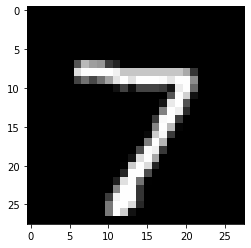

In [12]:
example=encoder.predict([x_test[0].reshape(-1,28,28,1)])
plt.imshow(x_test[0],cmap='gray')


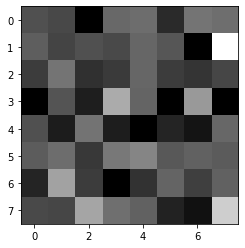

In [13]:
plt.imshow(example[0].reshape((8,8)),cmap='gray')

1/1 [==============================] - 0s 15ms/step


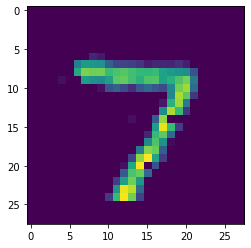

In [16]:
au_out=autoencoder.predict(x_test[0].reshape(-1,28,28,1))
plt.imshow(au_out[0])

In [20]:
l=keras.layers.Flatten()(encoder_input)